In [1]:
#PHYS 213
#Assignment 2
#Anne Xie
#Student Number: 20125978

[-4.01639590e+02  3.91308140e-01  1.19288419e+02  4.39894431e+00]


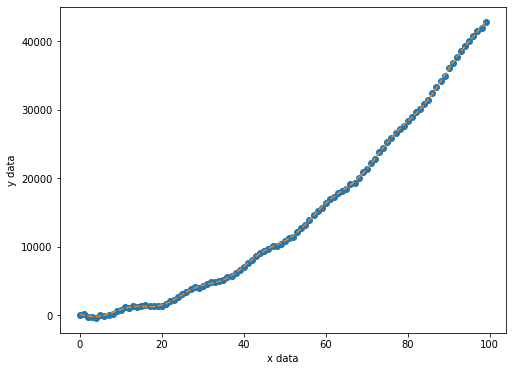

In [9]:
#Question 1
"""Read in the given data. Plot the data and fit a function to them. Determine the parameters
and chi-squared for the fit"""


#import libraries
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt

#read in data
x, y, uncert = np.loadtxt("assignment3_function.txt", 
                          delimiter = ',', 
                          unpack = True, 
                          skiprows = 1)

#Plot data
plt.rcParams['figure.figsize'] = 8,6
plt.plot(x, y, 'o')
#Label axis
plt.xlabel("x data")
plt.ylabel("y data")

#Define a quadratic function to fit
def fitFunction(x,*p):
    return p[0]*np.sin(p[1]*x) + p[2] + p[3]*x**2

#Fit the function onto the plot
fitParameters, fitCovariance = opt.curve_fit(fitFunction, x, y, p0 = (-600, 6/15, 0, 1), sigma = uncert)
xCheck = np.arange(0, 100, 1)
yCheck = fitParameters[0]*np.sin(fitParameters[1]*xCheck) +fitParameters[2] + fitParameters[3]*xCheck**2
plt.plot (xCheck, yCheck, '--', label = 'fit')

print (fitParameters)

[-15.94018331   0.42768913]


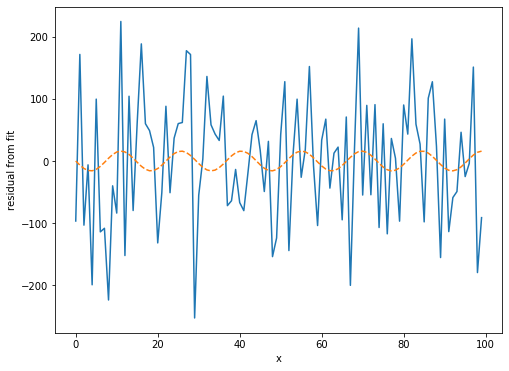

In [13]:
#Question 1 

#Set residuals as difference between the point and the fit
residual = (y -(yCheck))
#Plot the residuals
plt.plot(x, residual)
plt.xlabel('x')
plt.ylabel('residual from fit')

def aSine(x, *p): #Define function to fit to the residuals
    return p[0]*(np.sin(p[1]*x)) #sine function

#Fit function to residuads to see if there is a pattern
fitParameters, fitCovariance = opt.curve_fit(aSine, x, residual, p0 = (-400, 3.14/8), sigma = uncert, maxfev = 1000)
xSinefit = np.arange(0, 100, 1)
ySinefit = fitParameters[0]*np.sin(fitParameters[1]*x)
plt.plot (xSinefit, ySinefit, '--', label = 'fit')

print (fitParameters)

[-4.01639590e+02  3.91308140e-01  1.19288419e+02  4.39894431e+00]
0.003700356394036133


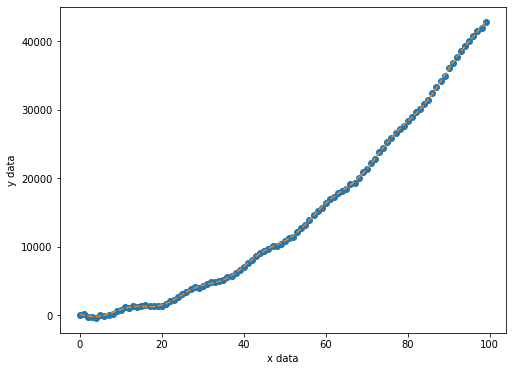

In [12]:
#Question 2
"""Complete question one using one function. Print out parameters and chi-squared."""

def Duplo(x, y, uncert):
    
    plt.plot(x, y, 'o') #plot data
    plt.xlabel("x data") #label x axis
    plt.ylabel("y data") #label y axis
    
    def fitLine(x, *p): #define a function to fit the data
        return p[0]*np.sin(p[1]*x) + p[2] + p[3]*x**2 #Use a sine and quadratic
    
    #fit the data with curve
    fitParameters, fitCovariance = opt.curve_fit(fitLine, x, y, p0 = (-600, 6/15, 0, 1), sigma = uncert)        
    xfitLine = np.arange(0,100,1)
    yfitLine = fitParameters[0]*np.sin(fitParameters[1]*x) + fitParameters[2] + fitParameters[3]*x**2
    plt.plot(xfitLine, yfitLine, '--', label = 'fit')
    print (fitParameters)
    
    for point in range(len(x)): #loop through all x values
        fitDiff = (y[point]-yfitLine[point])**2/uncert[point]**2 #find chi-squared value for each point
    chiSquared = np.sum(fitDiff) #sum up all values
    print (chiSquared)

Duplo(x, y, uncert)

[ 1.49413769e+03 -1.82278221e-01]
The chi-squared is 13.54812357755964
The inital number of atoms 1494.1376886238154 days +/- 26.29662436555507
The half life is 3.8026878680443215 days +/- 0.004581247709754943
The atom could be radon


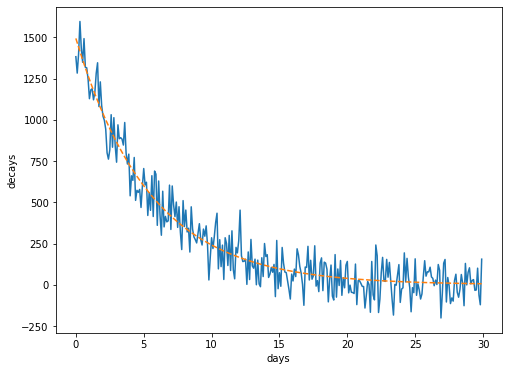

In [13]:
#Question 3
"""Read in the given data and fit it with the radioactive decay function. Print out the 
initial number of atoms and the half life with their uncertainties. Try to identify the 
element. """

#read in data
days, decays, uncert = np.loadtxt("assignment3_decay.txt", 
                                  delimiter = ',', 
                                  unpack = True, 
                                  skiprows = 1)

#plot the days vs decay of the substance
plt.plot(days, decays)
plt.xlabel("days")
plt.ylabel("decays")

#define radioactive decay function
def decayFit(x, *p):
    return p[0]*np.exp(p[1]*x)

#fit to the data
fitParameters, fitCovariance = opt.curve_fit(decayFit, days, decays, p0 = (1500,-1))
xDecay = np.arange(0, 30, 0.1)
yDecay = fitParameters[0]*np.exp(fitParameters[1]*xDecay)
plt.plot(xDecay, yDecay, '--', label = 'fit')
print (fitParameters)

for point in range(len(days)): #loop through every day
    #calculate every chi-squared value for the day
    fitDiff = (decays[point]-yDecay[point])**2/uncert[point]**2
chiSquared = np.sum(fitDiff)
print ("The chi-squared is", chiSquared)

#Find uncertainty for inital number of atoms and the half life
A0 = np.sqrt(fitCovariance[0,0])
A1 = np.sqrt(fitCovariance[1,1])

print ("The inital number of atoms", fitParameters[0],"days +/-", A0)
halfLife1 = np.log(2)/-fitParameters[1]
print ("The half life is", halfLife1,"days +/-", A1)
print ("The atom could be radon")

Text(0, 0.5, 'Number of seasons')

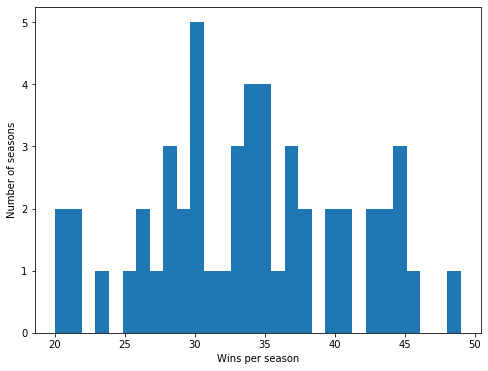

In [14]:
#Questin 4
"""Read in data and make a histogram. Fit the histogram to a Gaussian and determine how many
standard deviations away teh mean is from 80 wins a season."""

#Read in data
dataArray= np.loadtxt("leafs_data.txt", 
                      delimiter = ',',  
                      skiprows = 1)

year = dataArray[:, 0]
wins = dataArray[:, 2]

#Make histogram
n, bins, patches = plt.hist(wins, 30)
#label axis
plt.xlabel("Wins per season")
plt.ylabel("Number of seasons")

[ 2.53362433 33.60192136  8.43112642]


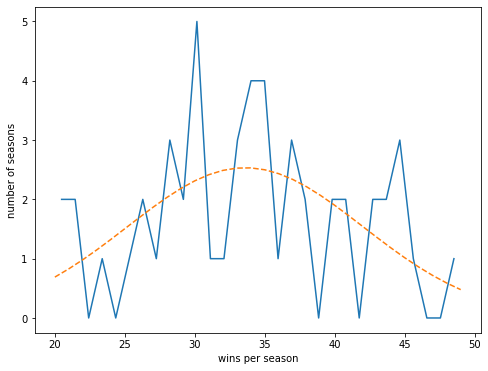

In [30]:
#Question 4 Part b

#Find the centre of each bin. These will be plotted on the x-axis
centre = np.zeros(len(bins)-1)
for i in range (len(bins)-1): #loop through every bin, except the last
    centre[i] = (bins[i]+bins[i+1])/2

#Plot the values    
plt.plot(centre, n)
plt.xlabel("wins per season")
plt.ylabel("number of seasons")

#Define a the Gaussian function
def gaussianFit(centre, *p):
    return p[0]*np.exp(-1*(centre-p[1])**2/(2*p[2]**2))

#Fit the Gaussian function to the plot
gParameters, gCovariance = opt.curve_fit(gaussianFit, centre, n, p0 = (1/5, 35, 5), maxfev = 1000)
xGauss = np.arange(20, 50, 1)
yGauss = gParameters[0]*np.exp(-1*(xGauss-gParameters[1])**2/(2*gParameters[2]**2))
plt.plot(xGauss, yGauss, '--', label = 'fit')
print (gParameters)

In [18]:
#The mean of the data is 33.60192136 wins per season and the standard deviation is 8.43112642
leafs = (80-33.60192136)/ 8.43112642
print ("An 80 win season is",leafs,"standard deviations from the mean.")

An 80 win season is 5.503188581057951 standard deviations from the mean.
